In [152]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVR
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [155]:
data['brand']=data['CarName'].apply(lambda x: x.lower().split()[0])

brands = {'maxda': 'mazda',
         'porcshce': 'porsche',
          'vokswagen': 'volkswagen',
          'vw': 'volkswagen',
          'toyouta': 'toyota'}
data['brand']=data['brand'].replace(brands)

In [156]:
# chuyển dữ liệu cylindernumber về dạng số.
units = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
        "nine", "ten", "eleven", "twelve"]
units = {x:y for x,y in zip(units, range(0,13))}

data['cylindernumber']=data['cylindernumber'].replace(units).astype('int')


In [157]:
data['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [159]:
int_=[ 'symboling','wheelbase', 'carlength', 'carwidth', 
             'carheight', 'curbweight',  'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'cylindernumber']
      
obj_=['fueltype', 'aspiration', 'carbody','doornumber','drivewheel', 'enginelocation', 
             'enginetype', 'fuelsystem', 'brand','symboling']

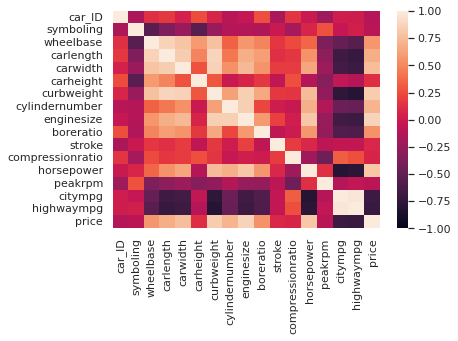

In [160]:
#correlation
corr_map=data.corr()
sns.heatmap(corr_map, vmax=1, vmin=-1)

In [161]:
corr_map[corr_map > 0.8]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symboling,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,NaN,NaN,1.000000,0.874587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carlength,NaN,NaN,0.874587,1.000000,0.841118,NaN,0.877728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,NaN,NaN,NaN,0.841118,1.000000,NaN,0.867032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carheight,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,NaN,NaN,0.877728,0.867032,NaN,1.000000,NaN,0.850594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.835305
cylindernumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.846031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginesize,NaN,NaN,NaN,NaN,NaN,NaN,0.850594,0.846031,1.000000,NaN,NaN,NaN,0.809769,NaN,NaN,NaN,0.874145
boreratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



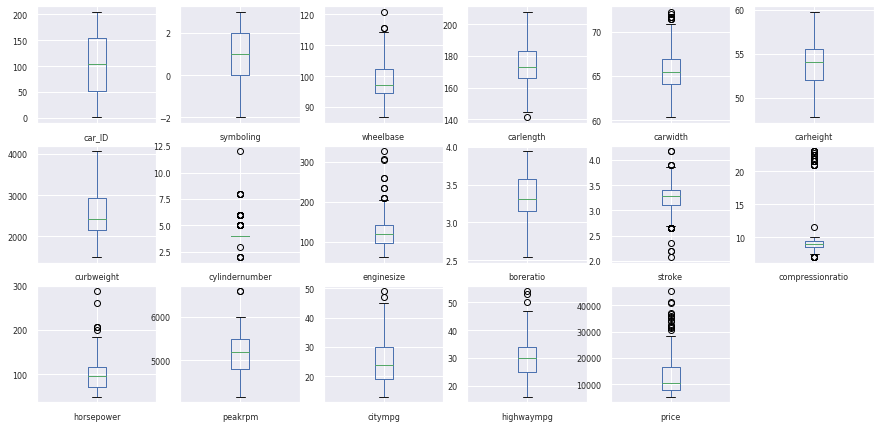

In [162]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [163]:
#loại bỏ cột có cor cao
data = train_data.drop(columns='highwaympg')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [164]:
q1 = data['price'].quantile(0.25)
q2 = data['price'].quantile(0.5)
q3 = data['price'].quantile(0.75)
iqr = 1.5 * (q3 - q1)

q99 = data['price'].quantile(0.99)

p = np.sum(((data['price'] > q1 - iqr) & (data['price'] < q3 + iqr))) / data.shape[0]
print('Percentage of outliers in column:', str(1 - p))

data = data[data['price'] < q99]

Percentage of outliers in column: 0.07317073170731703


In [165]:
q1 = data['carwidth'].quantile(0.25)
q2 = data['carwidth'].quantile(0.5)
q3 = data['carwidth'].quantile(0.75)
iqr = 1.5 * (q3 - q1)

q99 = data['carwidth'].quantile(0.99)

p = np.sum(((data['carwidth'] > q1 - iqr) & (data['carwidth'] < q3 + iqr))) / data.shape[0]
print('Percentage of outliers in column:', str(1 - p))

data = data[data['carwidth'] < q99]

Percentage of outliers in column: 0.0643564356435643


In [166]:
data= data[data['compressionratio'] <10]
data= data[data['citympg'] <45]
data= data[data['horsepower'] <180]
data= data[data['peakrpm'] <6000]


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            157 non-null    int64  
 1   symboling         157 non-null    int64  
 2   CarName           157 non-null    object 
 3   fueltype          157 non-null    object 
 4   aspiration        157 non-null    object 
 5   doornumber        157 non-null    object 
 6   carbody           157 non-null    object 
 7   drivewheel        157 non-null    object 
 8   enginelocation    157 non-null    object 
 9   wheelbase         157 non-null    float64
 10  carlength         157 non-null    float64
 11  carwidth          157 non-null    float64
 12  carheight         157 non-null    float64
 13  curbweight        157 non-null    int64  
 14  enginetype        157 non-null    object 
 15  cylindernumber    157 non-null    object 
 16  enginesize        157 non-null    int64  
 1

In [168]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Các biến phân loại trong tập bộ liệu:", object_cols)

Các biến phân loại trong tập bộ liệu: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [169]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [170]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [171]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,2,0,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,3,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,3,0,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,3,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,1,0,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,3,2.68,3.47,9.0,154,5000,19,16500.0
4,5,2,4,0,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,3,3.19,3.40,8.0,115,5500,18,17450.0
5,6,2,8,0,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,2,1,136,3,3.19,3.40,8.5,110,5500,19,15250.0


In [174]:
X = data.drop(columns='price')
y = data['price']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=22)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [176]:
a = StandardScaler().fit_transform(X_train)
b = StandardScaler().fit_transform(np.array(y_train).reshape(-1, 1))

svr = svm.SVR()
param = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

reg = GridSearchCV(svr, param_grid=param)
reg.fit(a, b)
reg.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConv

0.7479516839647934

In [177]:
reg.best_params_

{'C': 1, 'kernel': 'rbf'}

In [178]:
reg = LinearRegression()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))
print('R-squared:', str(reg.score(X_test, y_test)))

MSE: 8825455.26981579
RMSE: 2970.7667814582464
R-squared: 0.7956127307798564


In [179]:
from sklearn.linear_model import Ridge

mse = []

for a in np.arange(0, 1000, 10):

    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    mse.append(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))

dta = {'Alpha': np.arange(0, 1000, 10), 'MSE': mse}

df = pd.DataFrame(data=dta)

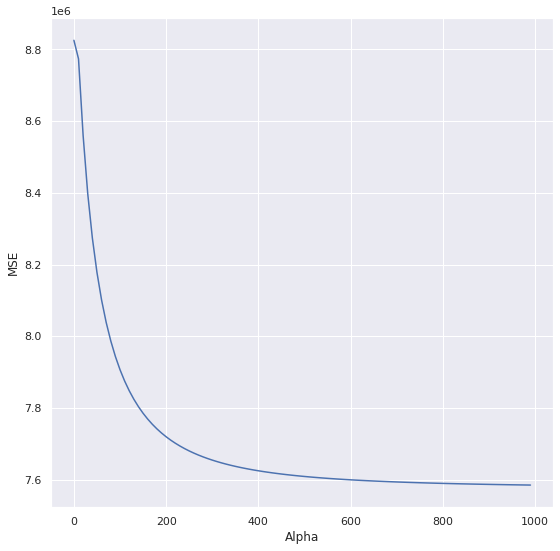

In [180]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.lineplot(x='Alpha', y='MSE', data=df)

In [182]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('MSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))
print('R-squared:', str(ridge.score(X_test, y_test)))

MSE: 8773651.720431624
RMSE: 2962.0350640111646
R-squared: 0.7968124406725293


In [183]:
regr = make_pipeline(StandardScaler(), SVR(C=10, epsilon=0.2))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('R-squared:', str(regr.score(X_test, y_test)))
print('MSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))

R-squared: -0.01428661623942884
MSE: 43796960.52767489
RMSE: 6617.927207795118
